<a href="https://colab.research.google.com/github/MarkBuchbach/Coursera_Capstone/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [16]:
file = 'australian_postcodes.csv'
df = pd.read_csv(file)
print(df)

          id  postcode  ...              sa4name region
0        230       200  ...                  NaN     R1
1      21820       200  ...                  NaN     R1
2        232       800  ...               Darwin     R1
3        233       801  ...               Darwin     R1
4        234       804  ...               Darwin     R1
...      ...       ...  ...                  ...    ...
18267  11185      9010  ...  Brisbane Inner City     R1
18268  11186      9013  ...  Brisbane Inner City     R1
18269  11187      9015  ...  Brisbane Inner City     R1
18270  11196      9464  ...     Brisbane - North     R1
18271  11197      9726  ...           Gold Coast     R2

[18272 rows x 14 columns]


In [17]:
df.head()

,id,postcode,locality,state,long,lat,dc,type,status,sa3,sa3name,sa4,sa4name,region
0,230,200,ANU,ACT,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R1
1,21820,200,Australian National University,ACT,149.118900,-35.277700,NaN,NaN,Added 19-Jan-2020,NaN,NaN,NaN,NaN,R1
2,232,800,DARWIN,NT,130.836680,-12.458684,NaN,NaN,Updated 6-Feb-2020,70101.0,Darwin City,701.0,Darwin,R1
3,233,801,DARWIN,NT,130.836680,-12.458684,NaN,NaN,Updated 25-Mar-2020 SA3,70101.0,Darwin City,701.0,Darwin,R1
4,234,804,PARAP,NT,130.873315,-12.428017,NaN,NaN,Updated 25-Mar-2020 SA3,70102.0,Darwin Suburbs,701.0,Darwin,R1


In [18]:
df= df[df['state'] == "QLD"]

In [19]:
df=df[df['region'] == "R1"]

In [20]:
df.tail()

,id,postcode,locality,state,long,lat,dc,type,status,sa3,sa3name,sa4,sa4name,region
18266,11341,9009,BRISBANE,QLD,152.823141,-27.603479,CITY DC - BRISBANE,LVR,Updated 25-Mar-2020 SA3,30504.0,Brisbane Inner - West,305.0,Brisbane Inner City,R1
18267,11185,9010,BRISBANE,QLD,152.823141,-27.603479,CITY DC - BRISBANE,LVR,Updated 25-Mar-2020 SA3,30504.0,Brisbane Inner - West,305.0,Brisbane Inner City,R1
18268,11186,9013,BRISBANE,QLD,152.823141,-27.603479,CITY DC - BRISBANE,LVR,Updated 25-Mar-2020 SA3,30504.0,Brisbane Inner - West,305.0,Brisbane Inner City,R1
18269,11187,9015,BRISBANE,QLD,152.823141,-27.603479,CITY DC - BRISBANE,LVR,Updated 25-Mar-2020 SA3,30504.0,Brisbane Inner - West,305.0,Brisbane Inner City,R1
18270,11196,9464,NORTHGATE MC,QLD,153.074982,-27.397055,NaN,NaN,Updated 25-Mar-2020 SA3,30203.0,Nundah,302.0,Brisbane - North,R1


In [21]:
df2 = df.drop(['id','locality','state','dc','type','status','sa3','sa3name', 'sa4', 'sa4name','region'], axis=1)
df3 = df2.drop_duplicates(subset = ['postcode'])
df3

,postcode,long,lat
9614,4000,153.022126,-27.468391
9623,4001,152.823141,-27.603479
9627,4002,0.000000,0.000000
9629,4003,152.348462,-24.872431
9630,4004,149.316593,-24.045265
...,...,...,...
18266,9009,152.823141,-27.603479
18267,9010,152.823141,-27.603479
18268,9013,152.823141,-27.603479
18269,9015,152.823141,-27.603479


In [22]:
metro = df.groupby('postcode')['locality'].apply(','.join)

In [ ]:
print(metro)

postcode
4000    BRISBANE,BRISBANE ADELAIDE STREET,BRISBANE CIT...
4001    BRISBANE,CENTRAL PLAZA,RIVERSIDE CENTRE,WATERF...
4002               BRISBANE ALBERT STREET BC,WINTERGARDEN
4003                                        GEORGE STREET
4004                                          SPRING HILL
                              ...                        
9009                                             BRISBANE
9010                                             BRISBANE
9013                                             BRISBANE
9015                                             BRISBANE
9464                                         NORTHGATE MC
Name: locality, Length: 135, dtype: object


In [23]:
Merged = pd.merge(df3, metro, left_on=  ['postcode'],
                   right_on= ['postcode'], 
                   how = 'left')

In [24]:
#Remove administrative districts
Merged = Merged.drop(Merged[Merged['long'] < 140].index)

In [25]:
Merged.head

<bound method NDFrame.head of      postcode  ...                                           locality
0        4000  ...  BRISBANE,BRISBANE ADELAIDE STREET,BRISBANE CIT...
1        4001  ...  BRISBANE,CENTRAL PLAZA,RIVERSIDE CENTRE,WATERF...
3        4003  ...                                      GEORGE STREET
4        4004  ...                                        SPRING HILL
5        4005  ...                                 NEW FARM,TENERIFFE
..        ...  ...                                                ...
130      9009  ...                                           BRISBANE
131      9010  ...                                           BRISBANE
132      9013  ...                                           BRISBANE
133      9015  ...                                           BRISBANE
134      9464  ...                                       NORTHGATE MC

[134 rows x 4 columns]>

In [26]:
import json

!pip install geopy
from geopy.geocoders import Nominatim # 

import requests 
from pandas.io.json import json_normalize 


import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

!pip install folium
import folium 


In [27]:
address = 'Brisbane, QLD'

geolocator = Nominatim(user_agent="bne_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brisbane are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brisbane are -27.4689682, 153.0234991.


Remove outlying regions

In [28]:
Merged = Merged.drop(Merged[Merged['long'] > 153.266].index)
Merged = Merged.drop(Merged[Merged['long'] < 152.753].index)
Merged = Merged.drop(Merged[Merged['lat'] < -27.688].index)
Merged = Merged.drop(Merged[Merged['lat'] > -27.005].index)
Merged = Merged.drop(Merged[Merged['postcode'] > 4999].index)

In [ ]:
# create map of Brisbane using latitude and longitude values
bne = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
Merged.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["long"]], 
                                              radius=5,fill=True , popup=row['locality'])
                                             .add_to(bne), axis=1)

    
bne

In [ ]:
CLIENT_ID = '0DVBG4ITA5BOPOLIBQ1GPBHVJXETHAZLBQB045ZFX333LJVW' # your Foursquare ID
CLIENT_SECRET = '5TBLI10KQMZPWPNVQM3EI3JOKE45RG1JM2J5OYLXSFHY3FXU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0DVBG4ITA5BOPOLIBQ1GPBHVJXETHAZLBQB045ZFX333LJVW
CLIENT_SECRET:5TBLI10KQMZPWPNVQM3EI3JOKE45RG1JM2J5OYLXSFHY3FXU


In [ ]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
LIMIT = 300

In [ ]:
def getNearbyVenues(postcodes, names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for postcode, name, lat, lng in zip(postcodes, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            postcode,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Post Code', 'Neighbourhood',
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
bne_venues = getNearbyVenues(postcodes = Merged['postcode'],
                                  names=Merged['locality'],
                                   latitudes=Merged['lat'],
                                   longitudes=Merged['long'],
                                 )

BRISBANE,BRISBANE ADELAIDE STREET,BRISBANE CITY,BRISBANE CITY DC,BRISBANE GPO,BRISBANE-CITY,PARLIAMENT HOUSE,PETRIE TERRACE,SPRING HILL
BRISBANE,CENTRAL PLAZA,RIVERSIDE CENTRE,WATERFRONT PLACE
NEW FARM,TENERIFFE
BOWEN BRIDGE,BOWEN HILLS,BRISBANE EXHIBITION,FORTITUDE VALLEY,FORTITUDE VALLEY BC,HERSTON,MAYNE,NEWSTEAD
ASCOT,BRISBANE AIRPORT,DOOMBEN,HAMILTON,HAMILTON CENTRAL,WHINSTANES
BRISBANE AIRPORT,BULWER ISLAND,MEEANDAH,MYRTLETOWN,PINKENBA
EAGLE FARM,EAGLE FARM BC
ALBION,ALBION BC,ALBION DC,BREAKFAST CREEK
CLAYFIELD,EAGLE JUNCTION,HENDRA
NUNDAH,TOOMBUL,WAVELL HEIGHTS,WAVELL HEIGHTS NORTH
NORTHGATE,NORTHGATE MC
BANYO,NUDGEE,NUDGEE BEACH,VIRGINIA,VIRGINIA BC,VIRGINIA DC
BRACKEN RIDGE,BRIGHTON,BRIGHTON EVENTIDE,BRIGHTON NATHAN STREET,DEAGON,NASHVILLE,SANDGATE,SANDGATE DC,SHORNCLIFFE
FITZGIBBON,TAIGUM
CLONTARF,CLONTARF BEACH,CLONTARF DC,HUMPYBONG,MARGATE,MARGATE BEACH,SCOTTS POINT,WOODY POINT
NEWPORT,REDCLIFFE,REDCLIFFE NORTH,SCARBOROUGH
KIPPA-RING
ROTHWELL
ROYAL BRISBANE HOSPITAL
EILDON 

In [ ]:
print('There are {} uniques categories.'.format(len(bne_venues['Venue Category'].unique())))

There are 84 uniques categories.


In [ ]:
bne_onehot = pd.get_dummies(bne_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bne_onehot['Post Code'] = bne_venues['Post Code']

 
# move neighborhood column to the first column
fixed_columns = [bne_onehot.columns[-1]] + list(bne_onehot.columns[:-1])
bne_onehot = bne_onehot[fixed_columns]
bne_onehot.head()

,Post Code,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Creperie,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Himalayan Restaurant,Hot Dog Joint,Hungarian Restaurant,...,Kebab Restaurant,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Noodle House,North Indian Restaurant,Pakistani Restaurant,Persian Restaurant,Pet Café,Pizza Place,Poke Place,Portuguese Restaurant,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Singaporean Restaurant,Snack Place,Souvlaki Shop,Steakhouse,Sushi Restaurant,Swiss Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bne_totals = bne_onehot.groupby('Post Code').sum().reset_index()
bne_totals

In [32]:
file2 = 'MTotals.csv'
com = pd.read_csv(file2)
mergtot =com.groupby('Post Code').sum().reset_index()
print(mergtot)

     Post Code  American Restaurant  ...  Wine Bar  Wine Shop
0         4000                    3  ...         0          0
1         4001                    0  ...         0          0
2         4005                    2  ...         0          0
3         4007                    0  ...         0          0
4         4008                    0  ...         0          0
..         ...                  ...  ...       ...        ...
100       4506                    0  ...         0          0
101       4508                    0  ...         0          0
102       4509                    0  ...         0          0
103       4510                    0  ...         0          0
104       4516                    0  ...         0          0

[105 rows x 111 columns]


In [ ]:
bne_mean = bne_onehot.groupby('Post Code').mean().reset_index()
print(*bne_mean.columns, sep = "\n") 


Post Code
American Restaurant
Asian Restaurant
Australian Restaurant
BBQ Joint
Bagel Shop
Bakery
Bistro
Brazilian Restaurant
Breakfast Spot
Buffet
Burger Joint
Burrito Place
Cafeteria
Café
Cajun / Creole Restaurant
Cantonese Restaurant
Caribbean Restaurant
Chinese Restaurant
Creperie
Deli / Bodega
Dim Sum Restaurant
Diner
Donut Shop
Dumpling Restaurant
Ethiopian Restaurant
Fast Food Restaurant
Fish & Chips Shop
Food
Food Court
Food Stand
Food Truck
French Restaurant
Fried Chicken Joint
Gastropub
German Restaurant
Greek Restaurant
Himalayan Restaurant
Hot Dog Joint
Hungarian Restaurant
Indian Restaurant
Indonesian Restaurant
Irish Pub
Italian Restaurant
Japanese Restaurant
Kebab Restaurant
Korean BBQ Restaurant
Korean Restaurant
Latin American Restaurant
Lebanese Restaurant
Malay Restaurant
Mediterranean Restaurant
Mexican Restaurant
Middle Eastern Restaurant
Modern European Restaurant
Moroccan Restaurant
Noodle House
North Indian Restaurant
Pakistani Restaurant
Persian Restaurant
Pet C

In [33]:
X = mergtot.drop(columns='Post Code', axis = 1)

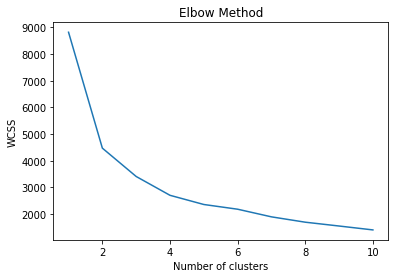

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Set** K = 4

In [36]:
n = 4
kmeans = KMeans(n_clusters = n, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [37]:
y_kmeans

array([0, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1,
       1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 2, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1], dtype=int32)

In [42]:
mergtot['Post Code'] = mergtot['Post Code'].astype(str)

num_top_venues = 5

for hood in mergtot['Post Code']:
    print("----"+hood+"----")
    temp = mergtot[mergtot['Post Code'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----4000----
                 venue  freq
0                 Café  34.0
1                  Bar  21.0
2         Burger Joint   9.0
3                  Pub   8.0
4  Japanese Restaurant   8.0


----4001----
                 venue  freq
0            BBQ Joint   1.0
1           Restaurant   1.0
2                 Café   1.0
3   Chinese Restaurant   1.0
4  American Restaurant   0.0


----4005----
                 venue  freq
0                 Café  15.0
1                  Bar   9.0
2   Italian Restaurant   8.0
3  Japanese Restaurant   6.0
4           Restaurant   4.0


----4007----
                 venue  freq
0                 Café  11.0
1          Pizza Place   4.0
2   Italian Restaurant   3.0
3  Japanese Restaurant   3.0
4         Burger Joint   3.0


----4008----
                   venue  freq
0                   Café  10.0
1   Fast Food Restaurant   7.0
2  Australian Restaurant   4.0
3                    Bar   2.0
4                 Bistro   2.0


----4009----
                        venue 

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Post Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Post Code'] = mergtot['Post Code']

for ind in np.arange(mergtot.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mergtot.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.shape

(105, 11)

In [45]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [46]:

BNE_Final = Merged
BNE_Final['postcode'] = BNE_Final['postcode'].astype(str)
BNE_Final = BNE_Final.join(neighborhoods_venues_sorted.set_index('Post Code'), on='postcode')
BNE_Final.dropna(inplace=True)
BNE_Final['Cluster Labels'].unique()

array([0., 1., 2., 3.])

In [47]:
BNE_Final['Cluster Labels'] = BNE_Final['Cluster Labels'].astype(int)

In [48]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(int(n))
ys = [i + x + (i*x)**2 for i in range(int(n))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BNE_Final['lat'], BNE_Final['long'], BNE_Final['locality'], BNE_Final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [56]:
highpop = BNE_Final
highpop['Cluster Labels'] = highpop['Cluster Labels'].astype(int)
indexNames = highpop[highpop['Cluster Labels'] == 1 ].index
highpop.drop(indexNames, inplace=True)

In [59]:
hptot = mergtot
hptot.insert(0, 'Cluster Labels', kmeans.labels_)


ValueError: ignored

In [60]:
index = hptot[hptot['Cluster Labels'] == 1 ].index
hptot.drop(index, inplace=True)

In [61]:
hptot

,Cluster Labels,Post Code,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Creperie,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Himalayan Restaurant,Hot Dog Joint,...,Snack Place,Souvlaki Shop,Steakhouse,Sushi Restaurant,Swiss Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Bar,Beer Bar,Beer Garden,Bowling Green,Brewery,Casino,Cocktail Bar,Coffee Shop,Dessert Shop,Dive Bar,Gay Bar,Hotel,Hotel Bar,Karaoke Bar,Lounge,Mini Golf,Night Market,Nightclub,Piano Bar,Pub,Speakeasy,Sports Bar,Sports Club,Whisky Bar,Wine Bar,Wine Shop
0,0,4000,3,1,7,1,1,1,2,2,3,1,9,1,0,34,0,0,0,1,0,1,0,0,1,2,0,0,0,0,0,0,0,3,0,3,3,1,0,0,...,1,0,3,4,0,0,0,0,5,0,0,2,3,0,21,4,4,0,2,1,7,2,1,2,0,1,2,1,1,0,0,0,0,8,0,0,0,3,0,0
2,2,4005,2,1,2,1,0,2,0,1,2,2,2,0,0,15,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0,...,1,1,3,2,0,0,0,1,3,0,0,0,0,0,9,2,1,1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
3,3,4007,0,1,1,0,0,2,0,0,2,0,3,1,0,11,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3,4008,0,1,4,0,0,0,2,0,1,0,0,0,0,10,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3,4010,0,1,0,0,0,2,1,0,1,0,0,1,0,8,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,3,0,0,0,0,3,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
7,3,4011,0,0,1,0,0,2,0,0,1,0,0,1,0,8,0,0,0,1,0,1,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,2,0,0,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,3,4012,0,0,1,0,0,1,0,0,0,0,1,0,0,11,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0
17,2,4029,0,4,1,0,0,4,0,0,0,0,9,1,0,16,0,0,0,6,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,2,2,0,0,1,...,1,0,2,2,0,0,0,0,3,0,0,0,4,0,10,0,0,0,0,0,5,1,0,2,3,0,0,0,1,1,0,6,0,5,0,0,0,1,1,0
18,3,4030,0,2,0,0,0,3,0,0,1,0,0,0,0,10,0,0,0,2,0,0,0,1,0,0,0,3,2,0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,3,0,0,0,0,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
20,3,4032,0,2,1,0,0,4,0,0,0,0,2,0,0,8,0,0,0,0,0,0,0,0,0,0,0,4,1,1,1,0,0,0,2,0,2,0,0,0,...,0,0,0,3,0,0,0,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [63]:
# create map
map_cluster = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(int(n))
ys = [i + x + (i*x)**2 for i in range(int(n))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(highpop['lat'], highpop['long'], highpop['locality'], highpop['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow,
        fill_opacity=0.7).add_to(map_cluster)
       
map_cluster

In [65]:
hptot.to_csv(r'HPT.csv')